# Eigenschaften des WDI Datensatzes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
base= pd.read_csv('../Data/WDIData.csv') #see downloads worldbank
base = base.drop(['Country Code', 'Indicator Code', 'Unnamed: 66'], axis=1) 

In [3]:
na = base.isna().sum().sum()
na

15902638

In [4]:
notna = base.notna().sum().sum()
notna + na

24565632

In [5]:
na/(na + notna)

0.647353098833362

In [6]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

year = 1980
    
#load dataset
base= pd.read_csv('../Data/WDIData.csv') #see downloads worldbank
base = base.drop(['Country Code', 'Indicator Code', 'Unnamed: 66'], axis=1) #name of column 'Unnamed: 66' may differ
    
#drop groups of countries
countries = pd.read_csv('additional_data/countries.csv').drop('Unnamed: 0', axis=1)
base = pd.merge(base, countries, how='left')
df = base.loc[base['Type'] != 'Region'].drop('Type', axis=1)
    
#keep only years 1990-2020
#df = base.set_index(['Country Name', 'Indicator Name'])

df = df[['Country Name', 'Indicator Name', str(year)]]
df = df.set_index(['Country Name', 'Indicator Name']).unstack()
df.columns = df.columns.droplevel(0)

In [9]:
key_col = df.isna().sum().sort_values().index
key_idx = df.T.isna().sum().sort_values().index

In [10]:
key_col

Index(['Nitrous oxide emissions in energy sector (thousand metric tons of CO2 equivalent)',
       'Agricultural methane emissions (thousand metric tons of CO2 equivalent)',
       'Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent)',
       'Adjusted savings: mineral depletion (current US$)',
       'Methane emissions in energy sector (thousand metric tons of CO2 equivalent)',
       'Population, total', 'Population growth (annual %)',
       'Urban population (% of total population)',
       'Rural population (% of total population)', 'Rural population',
       ...
       'International tourism, number of arrivals',
       'International tourism, number of departures',
       'International tourism, receipts (% of total exports)',
       'International tourism, receipts (current US$)',
       'International tourism, receipts for passenger transport items (current US$)',
       'International tourism, receipts for travel items (current US$)',
       'Investm

In [11]:
df = df.reindex(key_idx)
df = df.T.reindex(key_col)

[]

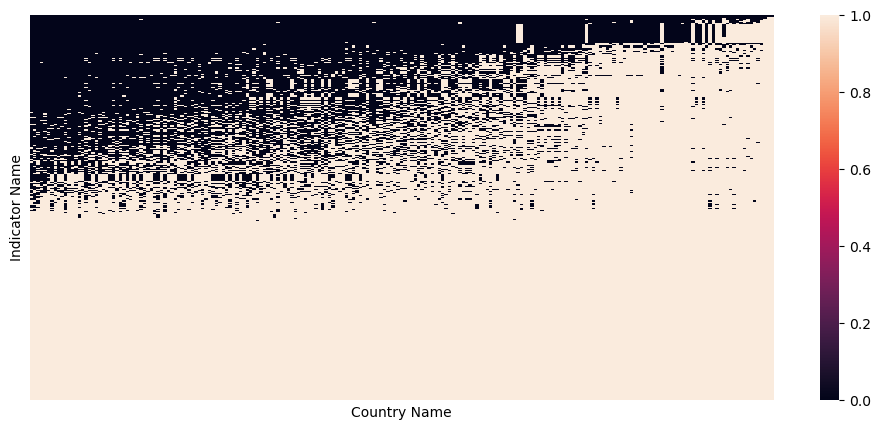

In [12]:
fig, ax = plt.subplots(figsize=(12,5))
sns.heatmap(df.isnull(), cbar=True)
ax.set_xticks([])
ax.set_yticks([])

In [13]:
base= pd.read_csv('../Data/WDIData.csv') #see downloads worldbank
base = base.drop(['Country Code', 'Indicator Code', 'Unnamed: 66'], axis=1) #name of column 'Unnamed: 66' may differ
    
#drop groups of countries
countries = pd.read_csv('additional_data/countries.csv').drop('Unnamed: 0', axis=1)
base = pd.merge(base, countries, how='left')
base = base.loc[base['Type'] != 'Region'].drop('Type', axis=1)
base = base.set_index(['Country Name', 'Indicator Name'])

In [19]:
nan = pd.DataFrame([base.notna().sum(), base.isna().sum()], index=['vorhanden', 'NaN'] ).T
nan.head(10)

,vorhanden,NaN
1960,30148,282983
1961,34213,278918
1962,36037,277094
1963,36009,277122
1964,36549,276582
1965,38464,274667
1966,38538,274593
1967,39982,273149
1968,39682,273449
1969,41239,271892


In [20]:
282983/(180777 +132354)

0.9037208069466134

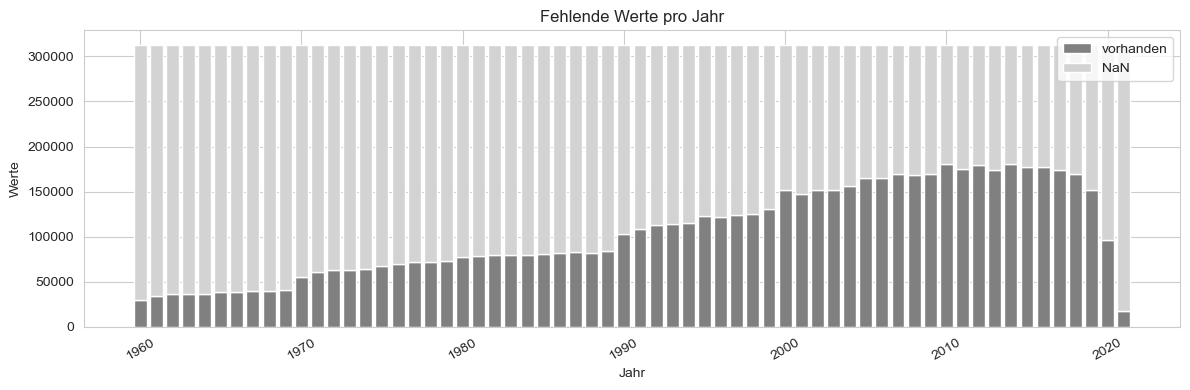

In [15]:
sns.set_style("whitegrid")

fig, ax1 = plt.subplots(figsize=(12,4))
ax1.bar((nan.index).astype(int), nan.vorhanden, label='vorhanden', color='gray')
ax1.bar( (nan.index).astype(int), nan.NaN, bottom=nan.vorhanden, color='lightgray', label='NaN')
ax1.tick_params(axis='x', rotation=30)

#ax1.grid(axis='y')
ax1.set_title('Fehlende Werte pro Jahr')
ax1.set_ylabel('Werte')
ax1.set_xlabel('Jahr')
ax1.legend()

plt.tight_layout()

plt.savefig('figures/results/NaN')